In [47]:
# importing pandas
import pandas as pd

In [48]:
# importing the data dictionary 
positive_diction=pd.read_csv('C:/Users/Azhar/Downloads/positive.csv')
negative_diction=pd.read_csv('C:/Users/Azhar/Downloads/negative_diction.csv',encoding = "ISO-8859-1")
#positive_diction.head()


In [49]:
#negative_diction.head()

In [50]:
# word net lemmatizer for lemmatizing the words
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [51]:
# lemmatizing the dictionary
positive_diction=[lemma.lemmatize(j.lower()) for j in positive_diction['Positive'].values]
negative_diction=[lemma.lemmatize(j.lower()) for j in negative_diction['Negative'].values]

In [58]:
# reading data with feedbacks
feedback=pd.read_csv("C:/Users/Azhar/Desktop/Feedback_detection/Hotel_feedbak2.csv")
df=pd.read_csv("C:/Users/Azhar/Desktop/Feedback_detection/Hotel_feedbak2.csv")

In [59]:
feedback

,Name,Feedback
0,Yash,Not good
1,Lakhan,Food was worst
2,Nilesh,overall good
3,Neha,Comfortable place
4,Henry,Bed was so dirty
5,Azhar,Room was clean
6,Sagar,I liked the hotel
7,Saif,Not sutisfied
8,Rishav,It was very nice
9,Yogini,Excellent position in the heart of town


In [60]:
# for tokenizing the words
from nltk import word_tokenize

In [61]:
# the function to return the sentiment scores
def return_pos_score(statement):
    tokens=word_tokenize(statement) # tokenizing the words
    pos_score=0
    neg_score=0
    for i,j in enumerate(tokens):
        
        if lemma.lemmatize(j.lower()) in positive_diction: # checing in positive dictionary
            if i!=0:
                # If the previous word is negative then exclude the positive word after it
                if lemma.lemmatize(tokens[i-1].lower()) in negative_diction: 
                    #print((tokens[i-1],j))
                    pass
                
                else:
                    pos_score=pos_score+1
            else:
                pos_score=pos_score+1
                    

        if lemma.lemmatize(j.lower()) in negative_diction: # getting the negative score
            neg_score=neg_score+1
    pos_score=pos_score/(len(tokens))
    neg_score=neg_score/(len(tokens))
    sentiment=''
    # if positive score is greater than the negative score, assign positive else negative sentiment
    if pos_score>=neg_score:
        sentiment='Positive'
    else:
        sentiment='Negative'
    com_score=pos_score+neg_score
    return([pos_score,neg_score,com_score,sentiment])

In [62]:
# calculating scores on data
feedback['pos_score']=feedback['Feedback'].apply(lambda x: return_pos_score(x)[0])
feedback['neg_score']=feedback['Feedback'].apply(lambda x: return_pos_score(x)[1])
feedback['com_score']=feedback['Feedback'].apply(lambda x: return_pos_score(x)[2])
feedback['sentiment']=feedback['Feedback'].apply(lambda x: return_pos_score(x)[3])

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Feedback"].apply(lambda x: sid.polarity_scores(x))

df = pd.concat([df.drop(['sentiments'], axis=1),df['sentiments'].apply(pd.Series)], axis=1)
df

,Name,Feedback,neg,neu,pos,compound
0,Yash,Not good,0.706,0.294,0.000,-0.3412
1,Lakhan,Food was worst,0.672,0.328,0.000,-0.6249
2,Nilesh,overall good,0.000,0.256,0.744,0.4404
3,Neha,Comfortable place,0.000,0.233,0.767,0.5106
4,Henry,Bed was so dirty,0.555,0.445,0.000,-0.5777
5,Azhar,Room was clean,0.000,0.426,0.574,0.4019
6,Sagar,I liked the hotel,0.000,0.417,0.583,0.4215
7,Saif,Not sutisfied,0.000,1.000,0.000,0.0000
8,Rishav,It was very nice,0.000,0.492,0.508,0.4754
9,Yogini,Excellent position in the heart of town,0.000,0.619,0.381,0.5719


In [64]:
feedback

,Name,Feedback,pos_score,neg_score,com_score,sentiment
0,Yash,Not good,0.000000,0.500000,0.500000,Negative
1,Lakhan,Food was worst,0.000000,0.333333,0.333333,Negative
2,Nilesh,overall good,0.500000,0.000000,0.500000,Positive
3,Neha,Comfortable place,0.500000,0.000000,0.500000,Positive
4,Henry,Bed was so dirty,0.000000,0.250000,0.250000,Negative
5,Azhar,Room was clean,0.333333,0.000000,0.333333,Positive
6,Sagar,I liked the hotel,0.250000,0.000000,0.250000,Positive
7,Saif,Not sutisfied,0.000000,0.500000,0.500000,Negative
8,Rishav,It was very nice,0.250000,0.000000,0.250000,Positive
9,Yogini,Excellent position in the heart of town,0.142857,0.000000,0.142857,Positive


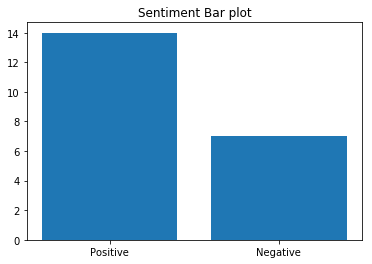

In [34]:
# plotting bar plot of sentiments
import matplotlib.pyplot as plt
sent=feedback['sentiment'].value_counts().reset_index()
plt.bar(sent['index'],sent['sentiment'])
plt.title('Sentiment Bar plot')
plt.show()

In [66]:
e=(feedback['sentiment']).count()
print("Total Feedback: ",e)

arr=feedback['sentiment'].values.flatten()
n=0
for x in arr:
    if x=="Positive":
        n+=1
print("No. Of Positive Feedback: ",n)
  
    
nc=0
for x in arr:
    if x=="Negative":
        nc+=1
print("No. Of Negative Feedback: ",nc)



Total Feedback:  21
No. Of Positive Feedback:  14
No. Of Negative Feedback:  7
